# Project 1- Prediction of House Prices- Kaggle competition Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r'E:\Downloads\train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
#data.columns

In [5]:
#data.info()

In [6]:
#data.describe()

# Exploratory Data Analysis [EDA]

Remember: EDA is to gather information from the dataset, so that's why we will always have to compare with the dependent variable.

* In Exploratory Data Analysis, we will analyze to find out:
    1. Missing Values
    2. Numerical variables(both discrete and continous)
    3. Distribution of Numerical features(Since it is a regression problem)
    4. Categorical variables
    5. Cardinality of Categorical varibles
    6. Outliers
    7. Relationship between independent and dependent variables
* NOTE: In this problem statement, we will only do data analysis on Training dataset.

# 1. Missing values

* We can check, how many null values are there in each feature(in %)

In [7]:
features_with_na=[feature for feature in data.columns if data[feature].isnull().sum()>1]
np.array([features_with_na])

array([['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
        'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']],
      dtype='<U12')

In [8]:
for i in features_with_na:
    print(i,np.round(data[i].isnull().mean(),4), '% Missing values')

LotFrontage 0.1774 % Missing values
Alley 0.9377 % Missing values
MasVnrType 0.0055 % Missing values
MasVnrArea 0.0055 % Missing values
BsmtQual 0.0253 % Missing values
BsmtCond 0.0253 % Missing values
BsmtExposure 0.026 % Missing values
BsmtFinType1 0.0253 % Missing values
BsmtFinType2 0.026 % Missing values
FireplaceQu 0.4726 % Missing values
GarageType 0.0555 % Missing values
GarageYrBlt 0.0555 % Missing values
GarageFinish 0.0555 % Missing values
GarageQual 0.0555 % Missing values
GarageCond 0.0555 % Missing values
PoolQC 0.9952 % Missing values
Fence 0.8075 % Missing values
MiscFeature 0.963 % Missing values


## Since, we can see there are many missing values, we need to find the relationship between those null values and the Target variable(SalePrice) to decide wheather to remove them or replace them.

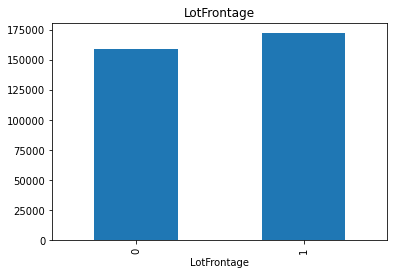

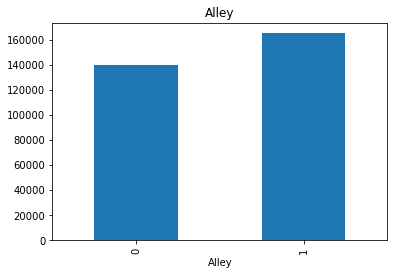

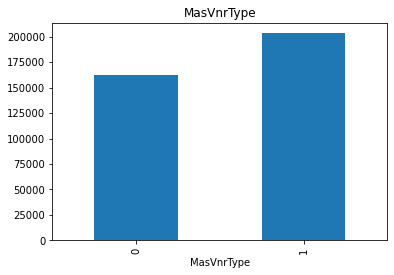

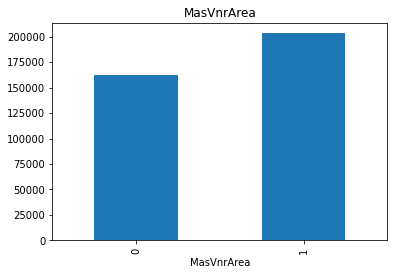

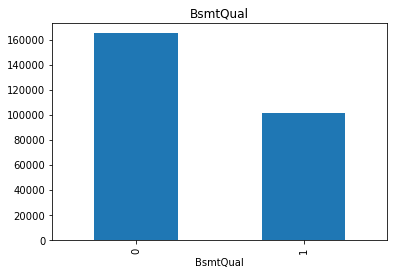

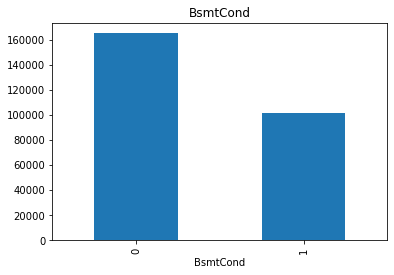

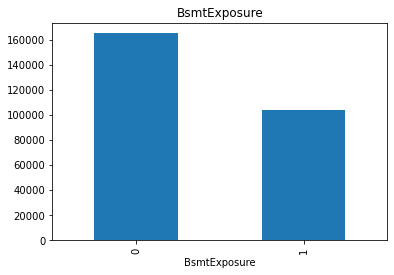

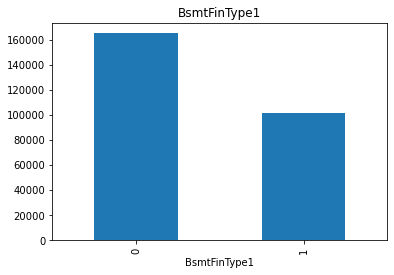

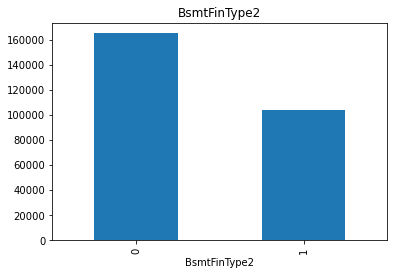

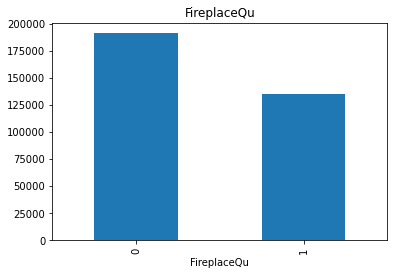

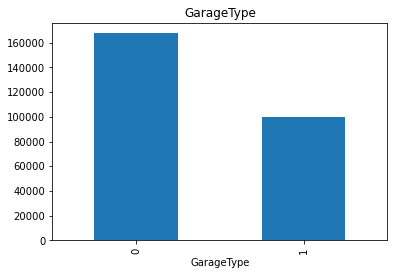

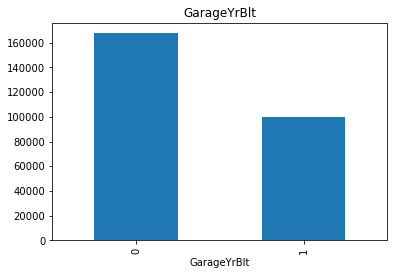

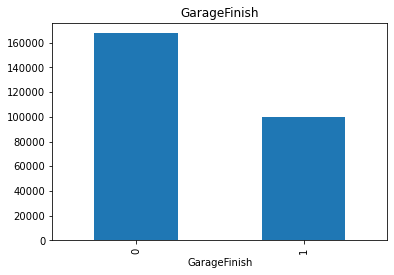

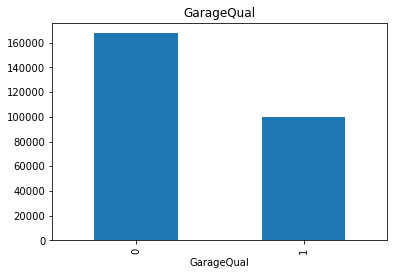

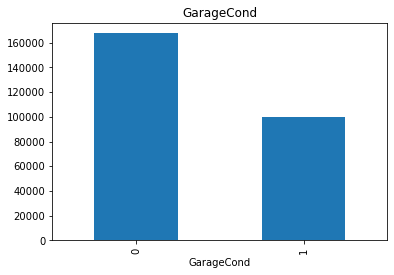

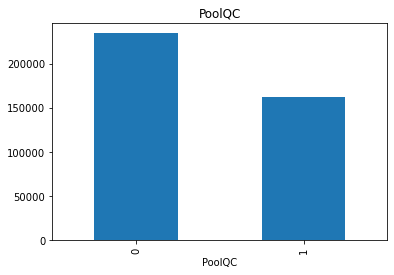

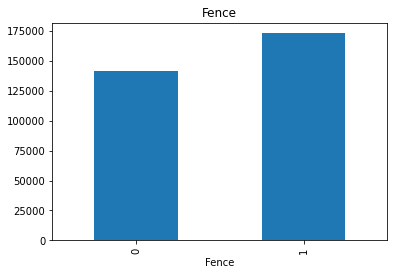

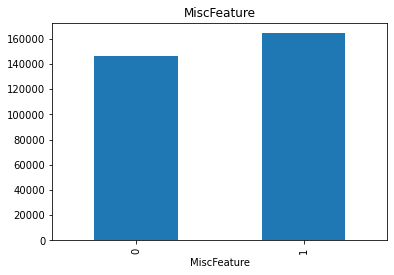

In [9]:
for j in features_with_na:
    
    n_data=data.copy()    ##copying our dataset to a new variable
    
    n_data[j]=np.where(n_data[j].isnull(),1,0)     ##1-Yes, there is null values and 0 for no null values
    
    n_data.groupby(j)['SalePrice'].median().plot.bar()
    
    plt.title(j)
    
    plt.show()
    
##This visualization is done inorder to know the importance of those null spaces wrt Target variable.   
    

* Here we can see, Higher null values corresponds to higher median SalePrice, which indiactes that the corresponding null spaces plays an important role and they needs to ne filled.

# 2. Numerical Features

In [10]:
##List of numerical features

num_feat=[feat for feat in data.columns if data[feat].dtypes!='O'] 

##It's a list comphrehension which says to iterate over all of the columns-
##-in our dataset and select the ones who are not object(strings) ie. select only numerical features.

print(np.array([num_feat]))

print( '*** Number of numerical variables are:', len(num_feat))

[['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
  'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
  'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
  'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
  'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
  'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
  '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
  'SalePrice']]
*** Number of numerical variables are: 38


## Temporal Variable or Datetime variable

* Here in our numerical features, we can see there are some attributes with Years.
* Year information must be handled carefully.
* We need to analyze those Year_info to check the relationship with the Target variable.

In [11]:
year_feat=[feat for feat in num_feat if 'Yr' in feat or 'Year' in feat]
year_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
y_u=data['YearBuilt'].unique()

print(y_u)

print('****Unique values in YearBuilt',len(y_u))

#print(len(data['YearBuilt']))

[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
****Unique values in YearBuilt 112


In [13]:
##finding unique values in all Year_columns

for j in year_feat:
    print(j,data[j].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

* Now let's analyze this temporal variables with SalePrice

<AxesSubplot:xlabel='YrSold'>

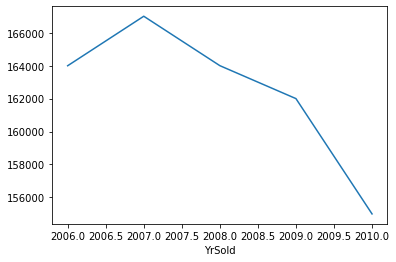

In [14]:
data.groupby('YrSold')['SalePrice'].median().plot()

* The graph shows the variation in SalePrice as per the Year in which it was sold.
* The trend is difficult to disgest as with growing year, price usually increase. We will check for all the Year_info columns wrt SalePrice.

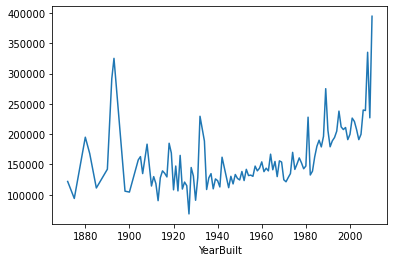

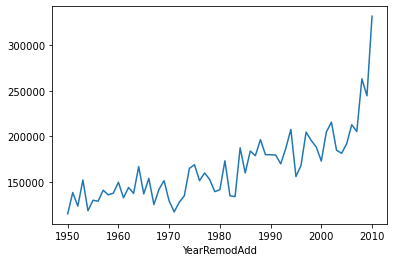

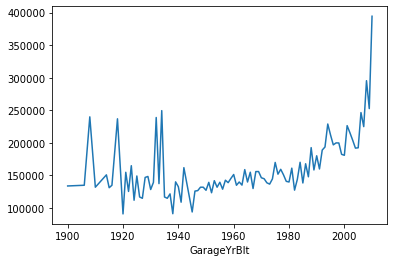

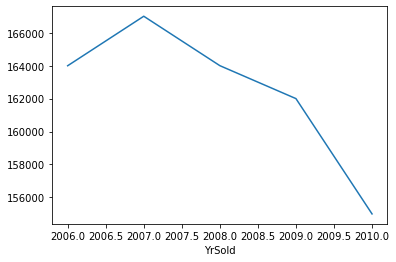

In [15]:
## Relationship bw Year_columns and SalePrice

for i in year_feat:
    data.groupby(i)['SalePrice'].median().plot()
    plt.show()

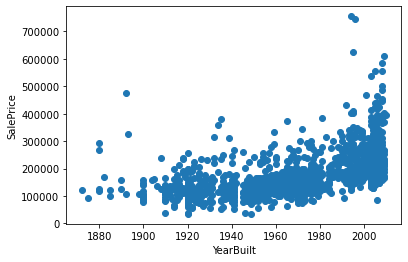

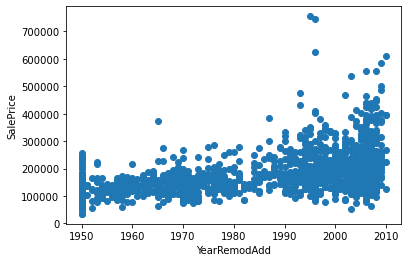

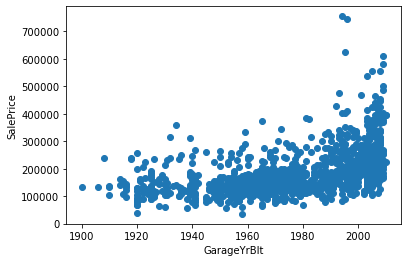

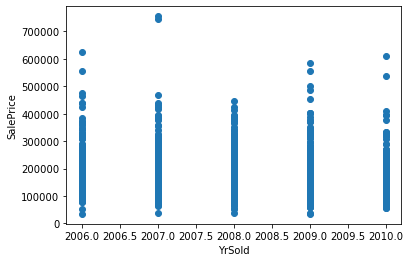

In [16]:
for i in year_feat:
    
    p_data=data.copy()
    
    plt.scatter(p_data[i],p_data['SalePrice'])
    
    plt.xlabel(i)
    
    plt.ylabel('SalePrice')
    
    plt.show()

# Discrete and Continous variables(Numerical Features)

* Numerical variables are usually of two types:
    1. Discrete variable
    2. Continous variable

* A discrete variable is a variable whose value is obtained by counting. A continuous variable is a variable whose value is obtained by measuring.
* Continuous data are data which can take any values. Examples include time, height and weight. Because continuous data can take any value, there are an infinite number of possible outcomes. So continuous data must be grouped before they can be represented in a frequency table or statistical diagram.
* Discrete data is information that can only take certain values. ... Continuous data is data that can take any value. Height, weight, temperature and length are all examples of continuous data.

* Discrete value - either it is 4 or 5 , its not 4.5 or 4.9....it's a specific quantam value.

.................

## Discrete variable

In [17]:
dis_feat=[i for i in num_feat if len(data[i].unique())<25 and i not in year_feat+['Id']]

print("Discrete Variables Count: {}".format(len(dis_feat)))

Discrete Variables Count: 17


In [18]:
np.array([dis_feat])

array([['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']],
      dtype='<U12')

In [19]:
data[dis_feat].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [20]:
data['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [21]:
data['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [22]:
data['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738], dtype=int64)

In [23]:
data['FullBath'].unique()

array([2, 1, 3, 0], dtype=int64)

* Let's check the relationship between discrete variables wrt SalePrice through some Visualization

<AxesSubplot:xlabel='OverallQual'>

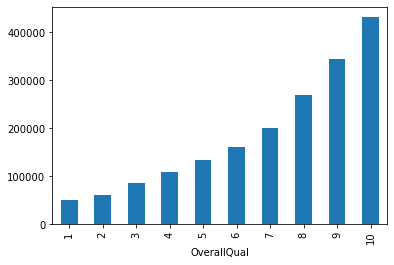

In [24]:
data.groupby('OverallQual')['SalePrice'].median().plot.bar()

* Here we can see, as the overall quality increases, SalePrice also increases exponentially.
  * This pattern is also called monotonic trend or graph or monotonic rise.

   * Yes, there is a relationship bw discrete features and SalePrice 

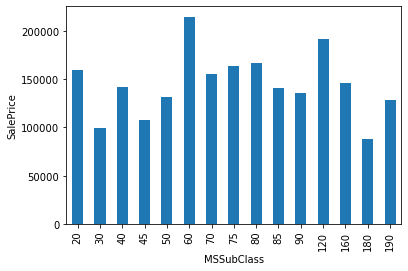

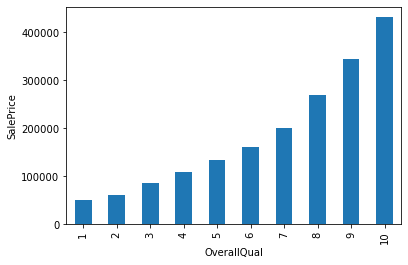

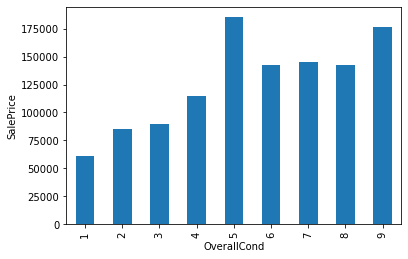

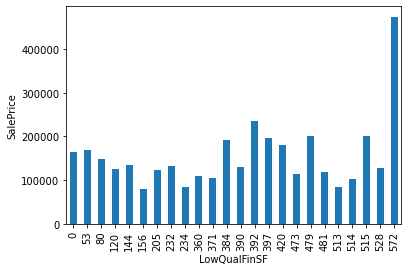

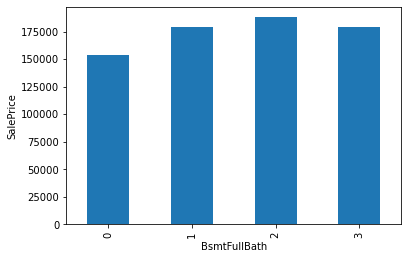

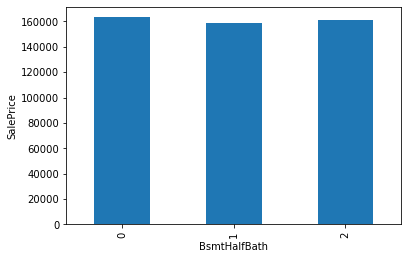

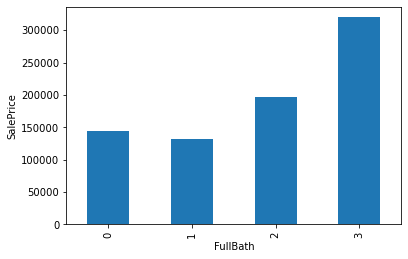

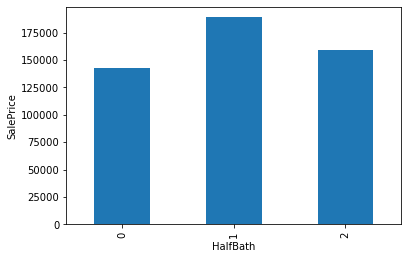

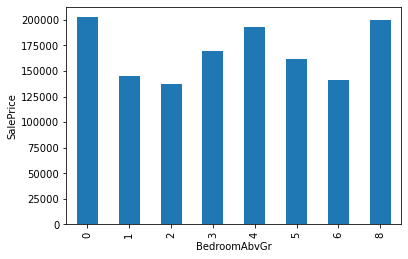

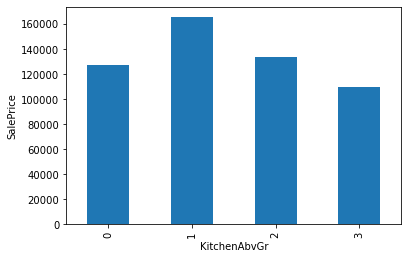

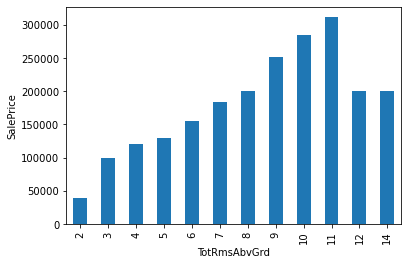

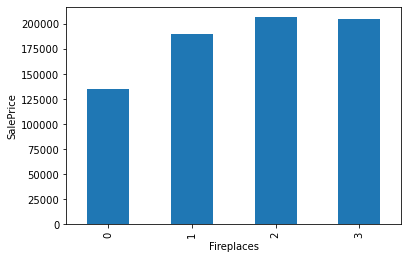

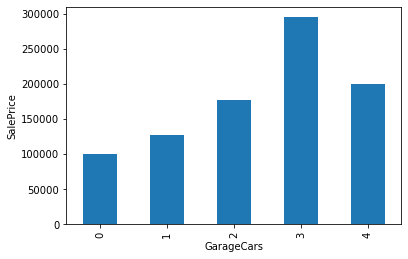

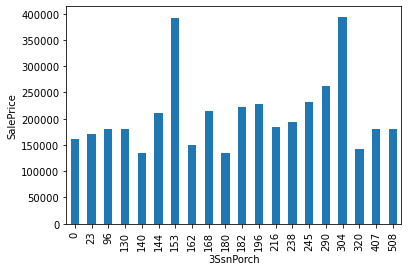

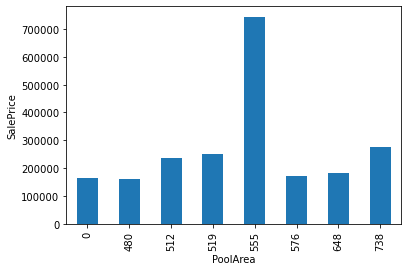

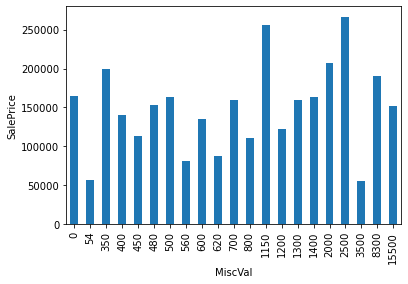

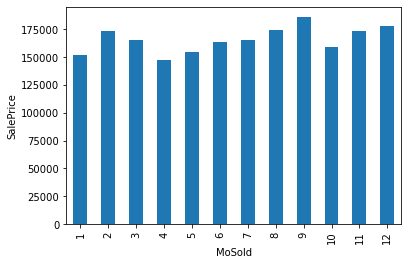

In [25]:
for j in dis_feat:
    
    n_data=data.copy()
    
    n_data.groupby(j)['SalePrice'].median().plot.bar()
    
    plt.xlabel(j)
    
    plt.ylabel('SalePrice')
    
    plt.show()

.................

## Continous variable

* Continous variable can take any value.

In [26]:
continous_feat=[j for j in num_feat if j not in dis_feat+year_feat+['Id']]
print(np.array([continous_feat]))
print( 'Number of continous variables:-' ,len(continous_feat))

[['LotFrontage' 'LotArea' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
  'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'GrLivArea'
  'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' 'ScreenPorch'
  'SalePrice']]
Number of continous variables:- 16


In [27]:
data[continous_feat].head()                ## DataFrame

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


In [28]:
data[continous_feat].shape

(1460, 16)

* This is Continous variable, we will see the distribution of data here.
   * WE will check for guassian distribution pattern since it is a regression problem statement.
   * It is favourable for our Linear Regression model if our data is normally distributed.
   * It should be not skewed.
   * If skewed, we will handle it through some transformation like log or sqrt method. 

## Determining Skewness in the data

.................."Let's see the distibution of data"...................

## Method_1: By visualizing through Histogram

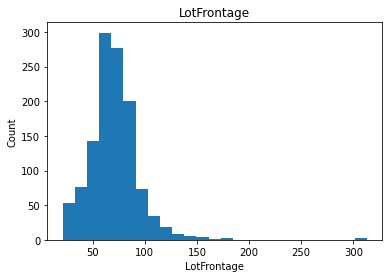

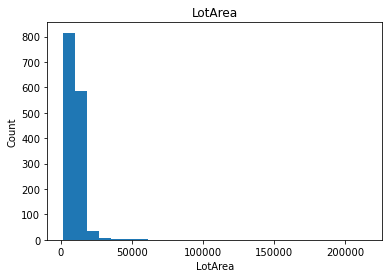

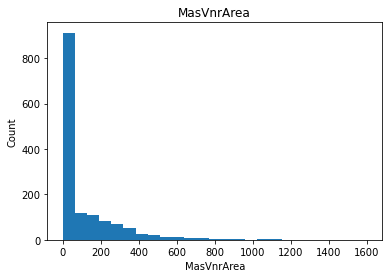

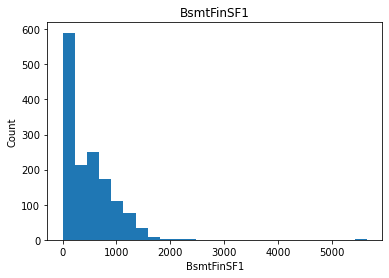

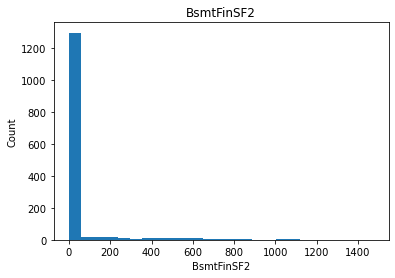

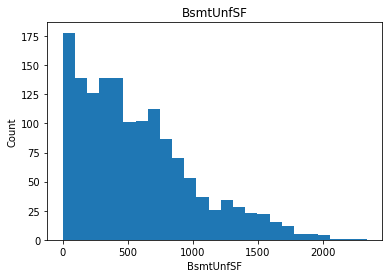

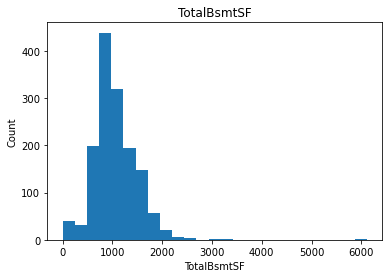

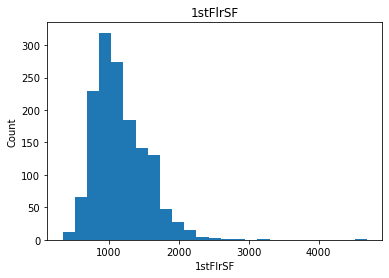

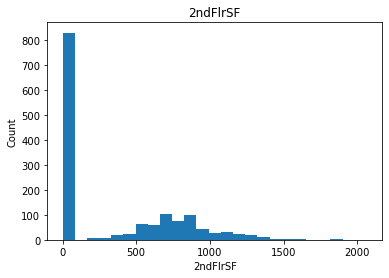

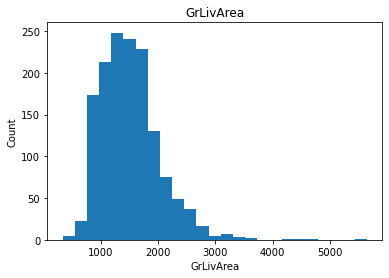

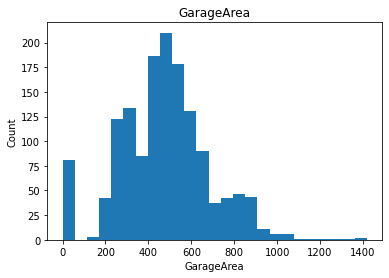

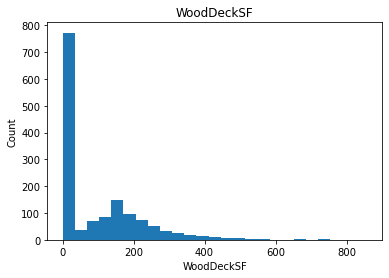

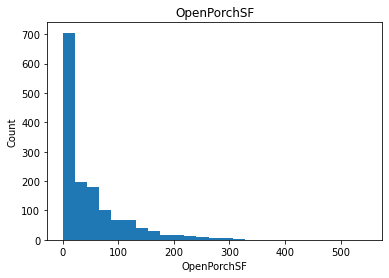

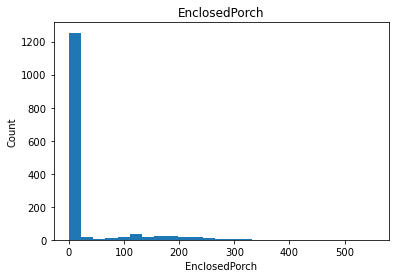

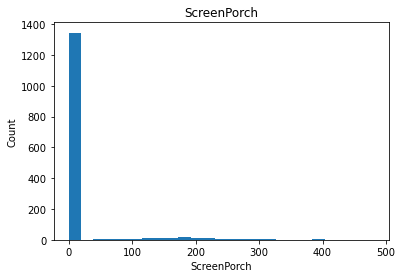

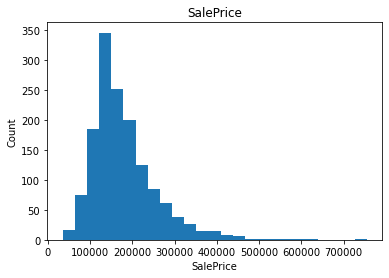

In [29]:
## Lets analyse the continuous values by creating histograms to understand the distribution.

for i in continous_feat:
    
    n_data=data.copy()
    
    n_data[i].hist(bins=25,grid=False)
    
    plt.xlabel(i)
    
    plt.ylabel('Count')
    
    plt.title(i)
    
    plt.show()
    

## Method_2: Shapiro wilk test

In [30]:
from scipy.stats import shapiro

stat,p_value=shapiro(data['SalePrice'])

print(stat)

print('p_value:', p_value)

0.869671642780304
p_value: 3.206247534576162e-33


*NOTE:
* Null Hypothesis:-Data is normally distributed.
* p_value has to less than 0.05 to H0 to be True
* Surprisingly, p_value is not less than 0.05 and hence we have to reject H0.
* Thus, we can say that our SalePrice data is skewed.

* Method_3: Using the skew() method 

In [31]:
data[continous_feat].skew().sort_values(ascending=False)

LotArea          12.207688
BsmtFinSF2        4.255261
ScreenPorch       4.122214
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
GarageArea        0.179981
dtype: float64

NOTE:
* We can see all the values are positive and hence almost all are right skewed or positively skewed.
* If skewness is negative, the data are negatively skewed or skewed left, meaning that the left tail is longer. ... If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* A few of the variables can be highly right skewed due to lots of zeros, this is okay

...................

* Hence, we can say that are data is skewed.

Q. But WHY ?

* Why do we care if the data is skewed? If the response variable is skewed like in Kaggle’s House Prices Competition, the model will be trained on a much larger number of moderately priced homes, and will be less likely to successfully predict the price for the most expensive houses. The concept is the same as training a model on imbalanced categorical classes. If the values of a certain independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions (e.g. logistic regression) or may impair the interpretation of feature importance.

......................

## Handling Skewness

##  Log Transformation

* Log transformation is most likely the first thing you should do to remove skewness from the predictor.
* It can be easily done via Numpy, just by calling the log() function on the desired column. You can then just as easily check for skew:

<AxesSubplot:>

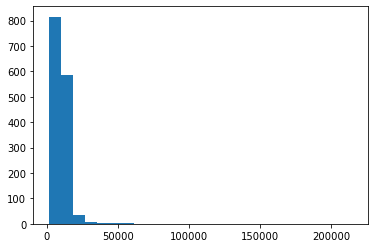

In [32]:
## Visualizing the distribution of the most skewed feature ie. [LotArea]

data['LotArea'].hist(bins=25,grid=False)

<AxesSubplot:>

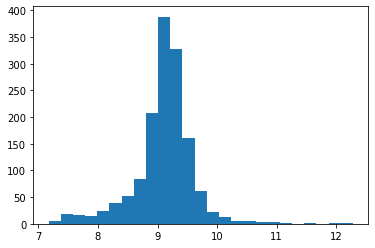

In [33]:
## Now if we apply logarithmic to this feature

np.log(data['LotArea']).hist(bins=25,grid=False)


* Hence we can see the difference.

* And now if we compare a skewed feature with the dependent variable

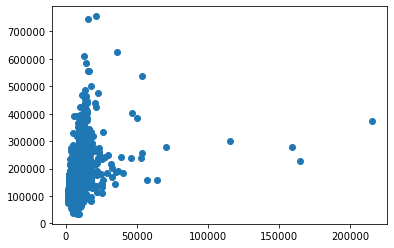

In [34]:
plt.scatter(data['LotArea'],data['SalePrice'])

plt.show()

* Here we can see due to skewness, we are unable to compare and see a pattern.

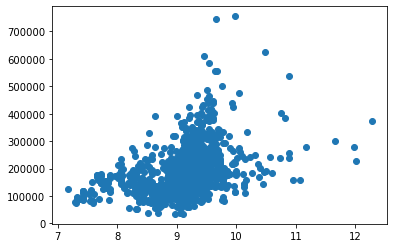

In [35]:
data['LotArea']=np.log(data['LotArea'])

plt.scatter(data['LotArea'],data['SalePrice'])

plt.show()

* Due to log transformation, we can see a rough pattern which is pretty comparable.

................Continous variable("Relationship between the continous var and Target vraible").................

## Will apply log transformation to all possible continous variables and will compare to Sale Price (Target Variable)

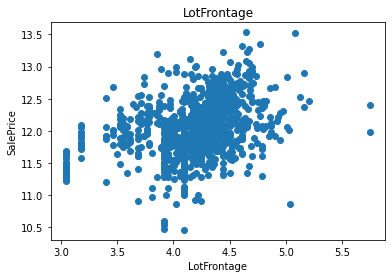

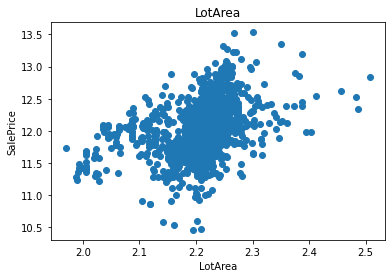

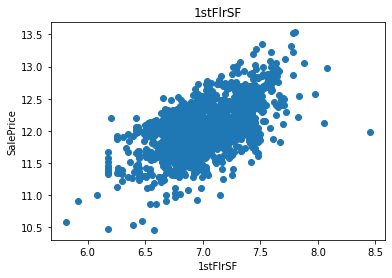

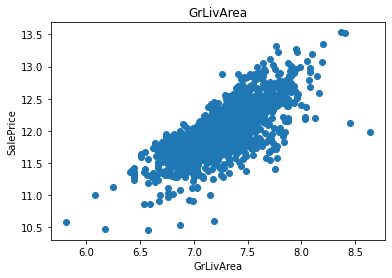

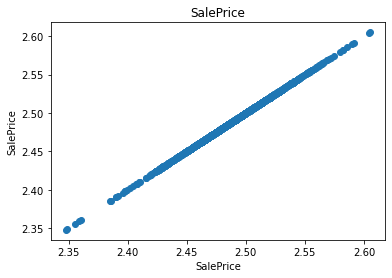

In [36]:
for i in continous_feat:
    
    n_data=data.copy()      ## So that any changes will not affect the origibal dataset.

                                    # variables can be highly right skewed due to lots of zeros,
    if 0 in n_data[i].unique():     # to remove most positive skewed ones()
        pass                        ## pass is null statement, statement results into no operation      
    else:
        n_data[i]=np.log(n_data[i])
        n_data['SalePrice']=np.log(n_data['SalePrice'])   
        
        plt.scatter(n_data[i],n_data['SalePrice'])
        
        plt.xlabel(i)
        
        plt.ylabel('SalePrice')
        
        plt.title(i)
        
        plt.show()

## Applied log transformation

In [37]:
##Apply log transformation to remove skewness

num_features=['LotFrontage','LotArea','1stFlrSF','GrLivArea']

for i in num_features:
    data[i]=np.log(data[i])

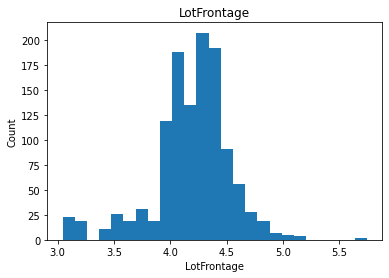

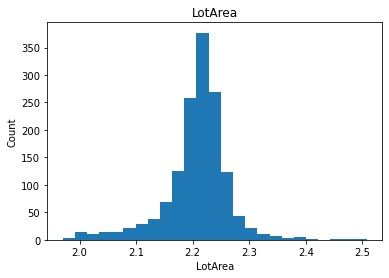

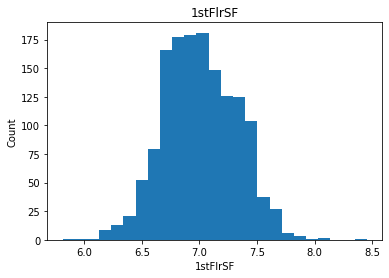

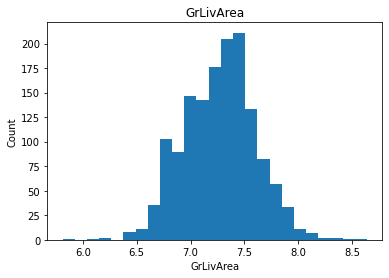

In [38]:
for i in num_features:
    
    n_data=data.copy()
    
    n_data[i].hist(bins=25,grid=False)
    
    plt.xlabel(i)
    
    plt.ylabel('Count')
    
    plt.title(i)
    
    plt.show()

In [39]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,2.201872,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,4.382027,2.215885,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,4.219508,2.233034,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,4.094345,2.215315,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,4.430817,2.258133,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# OUTLIERS

Q. What Outlier is?
  * Outliers are those data points which differs significantly from other observations present in given dataset. It can occur because of variability in measurement and due to misinterpretation in filling data points.

##  Box plot to detect Outlier

* One of the simplest methods for detecting outliers is the use of "BOX PLOT". A box plot is a graphical display for describing the distributions of the data. Box plots use the median and the lower and upper quartiles.

## * For a specific column:-

<AxesSubplot:xlabel='SalePrice'>

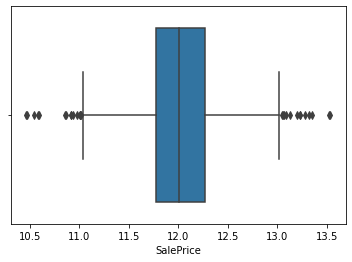

In [40]:
import seaborn as sns
sns.boxplot(x=np.log(data['SalePrice']))

* Above plot shows few points between 13 to 13.5, those are outliers as there are not included in the box of other observation i.e no where near the quartiles.

## *For the entire continous variable dataset:-

* Let's visualize outliers for all the continous variables.

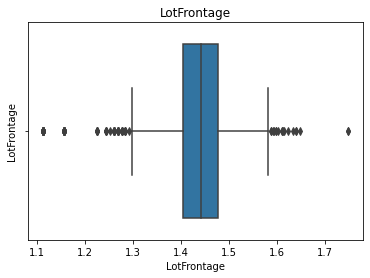

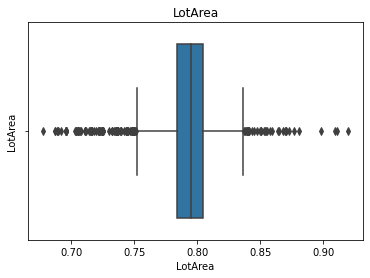

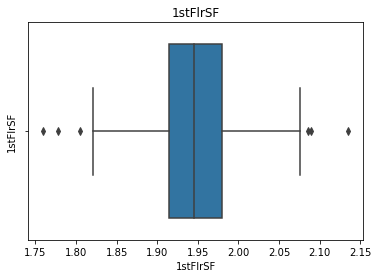

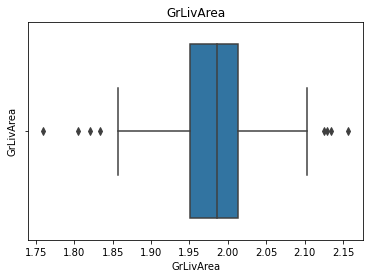

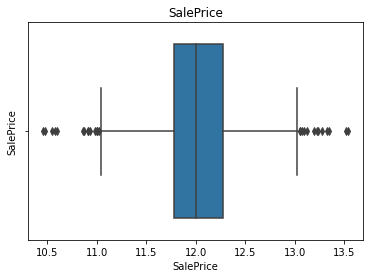

In [41]:
for i in continous_feat:
    
    n_data=data.copy()
    
    if 0 in n_data[i].unique():
        pass
    else:
        n_data[i]=np.log(n_data[i])
        
        sns.boxplot(x=n_data[i])
        
        #n_data.boxplot(column=i)
        
        plt.ylabel(i)
        plt.title(i)
        plt.show()
        

## We will not remove outliers from every feature as it may affect the model since test set will have outliers too and our model needs to be robust against them

# Categorical Variables

* Categorical variables are those values in a dataset that contains different unique categories.

* Categorical Variables are of two types:
    1. Nominal variables: Unordered variables which doesn't have any sense of Order. For Example:
        * male/female
        * smoker/non-smoker
        * sunny/cloudy/rainy/windy/icy (There is no logic to rank windy before sunny)
        * yes/no or True/False
     * NOTE: USE ONE HOT ENCODING.
        
    2. Ordinal variables: Ordered variables which have some sense of order or rank or notion of order. For Example:
        * Education level(BE,ME,Phd)
        * Shirt size(XS,S,M,L,XL)
        * 1/2/3/4/(minimal/moderate/severe/unbearable pain)
     * NOTE: USE LABEL ENCDOING

In [42]:
##list comprehension to get categorical variables

cat_feat=[i for i in data.columns if data[i].dtype=='O']
print(np.array([cat_feat]))
print('Number of categorical variables are:' ,len(cat_feat))

[['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
  'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
  'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
  'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
  'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
  'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
  'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
  'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
  'SaleCondition']]
Number of categorical variables are: 43


In [43]:
## Transform the list to dataframe

data[cat_feat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Note: In categorical varibles, we need to focus on the cardinality of the features.
         * The number of unique categories in a variable is called "cardinality".
         * Cardinality helps in deciding the method of Encoding.

In [44]:
#for j in cat_feat:
    #print('The feature is {} and number of categories are {}'.format(j,data[j].unique()))
    #print('The feature is {} and number of categories are {}'.format(j,len(data[j].unique())))

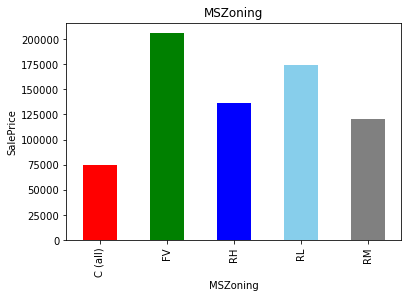

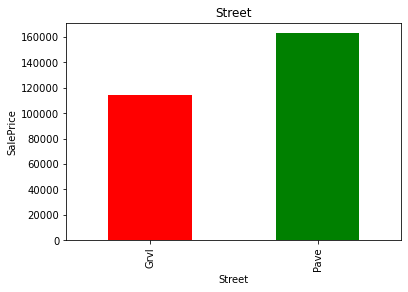

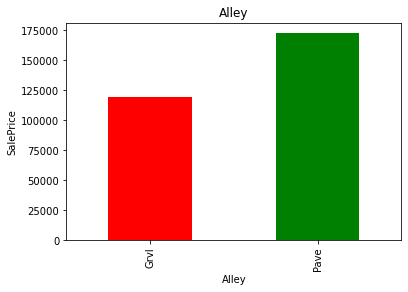

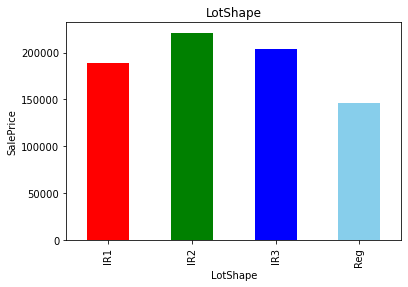

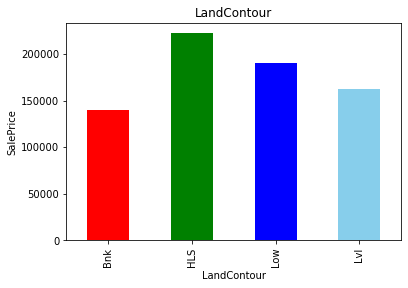

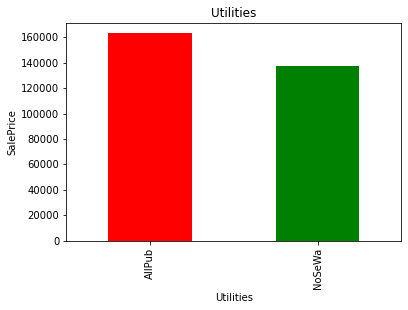

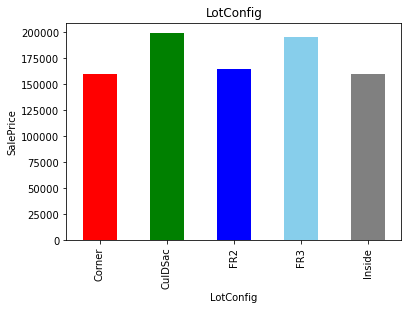

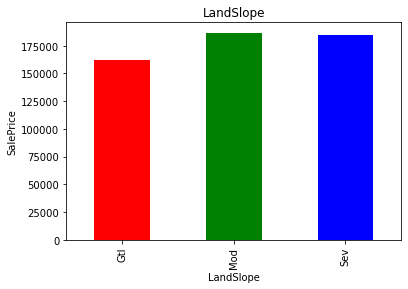

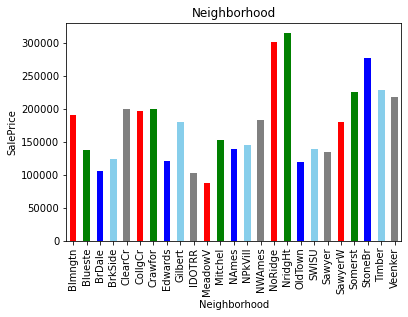

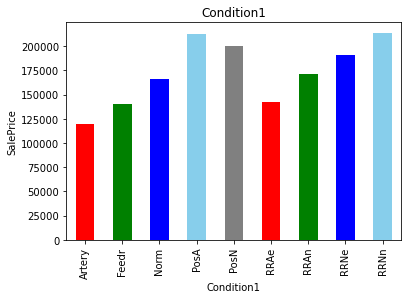

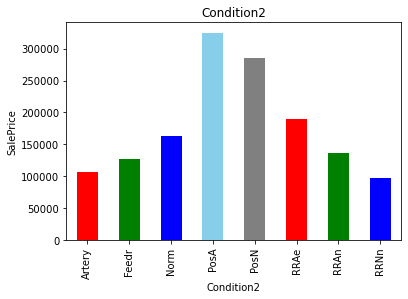

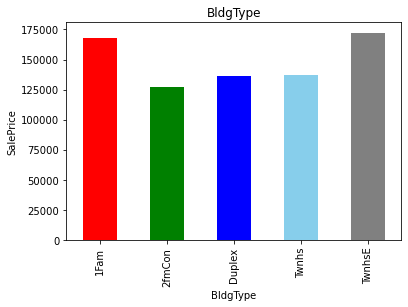

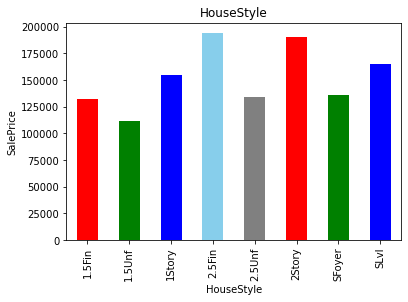

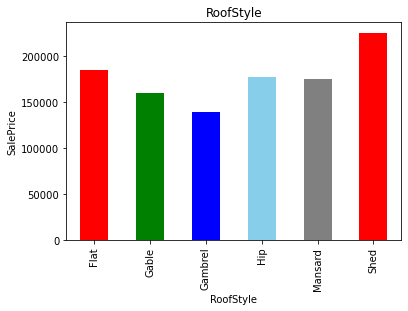

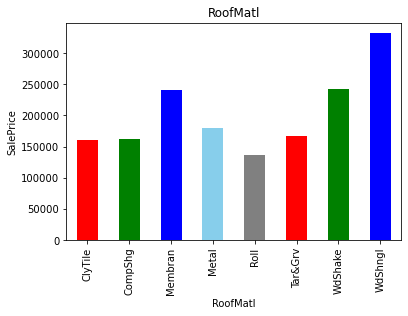

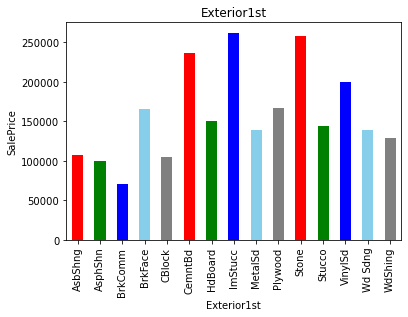

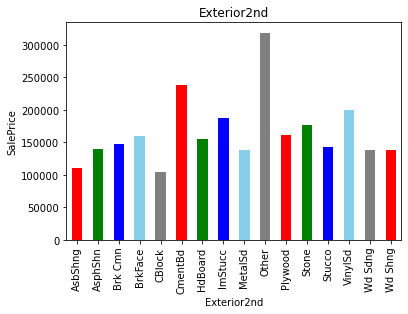

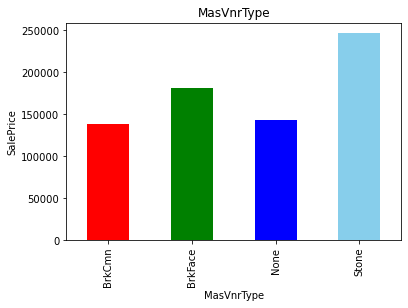

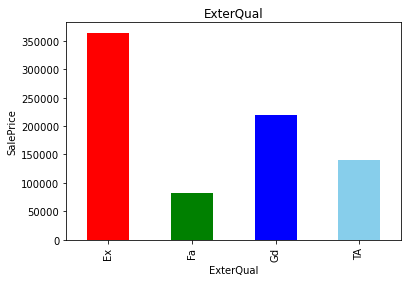

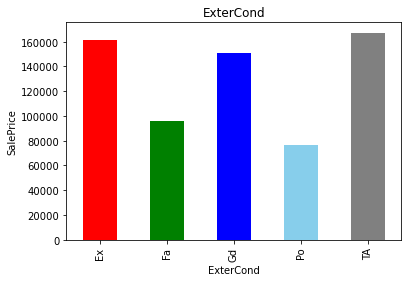

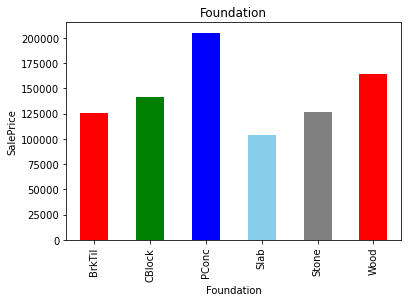

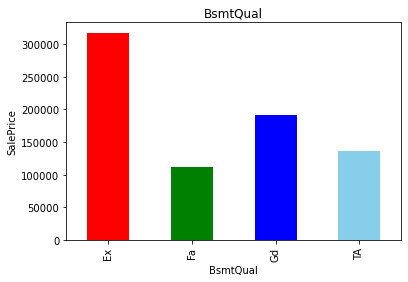

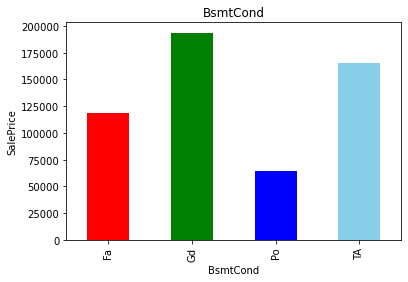

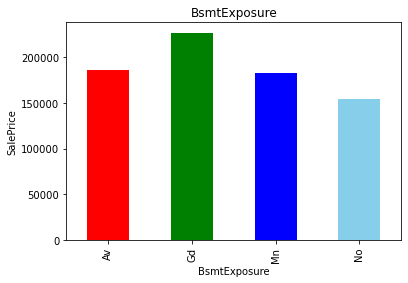

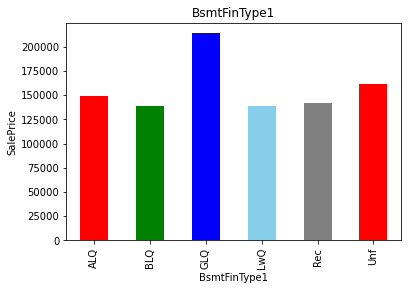

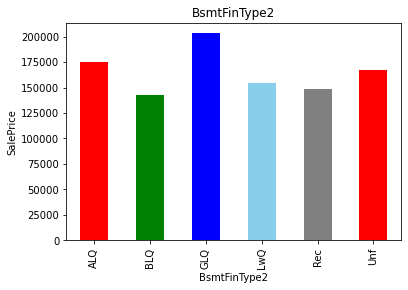

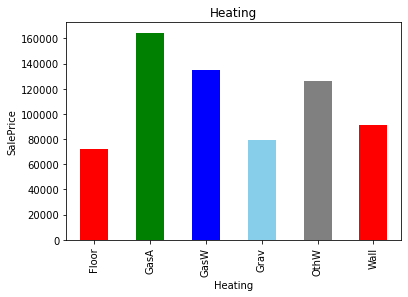

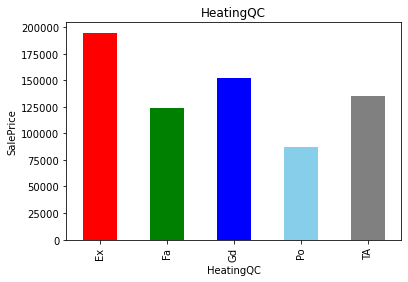

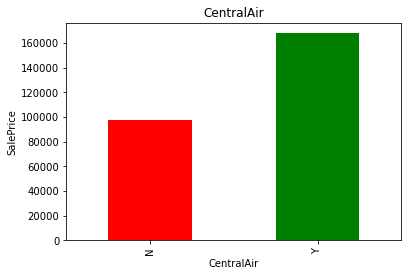

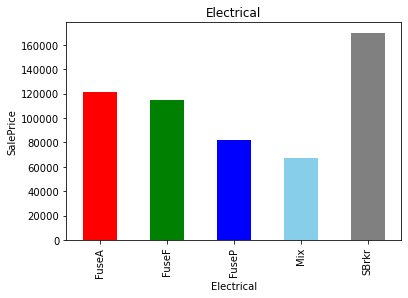

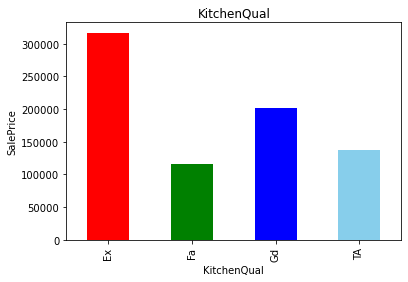

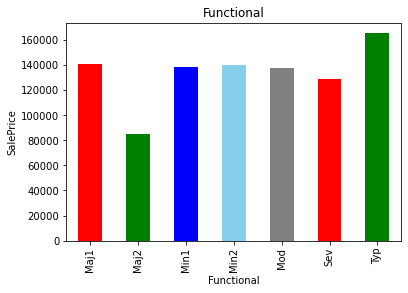

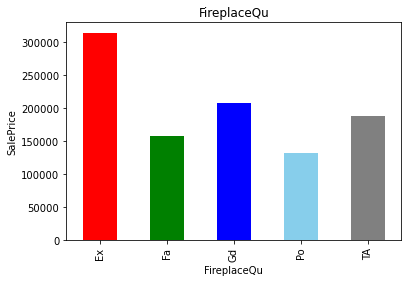

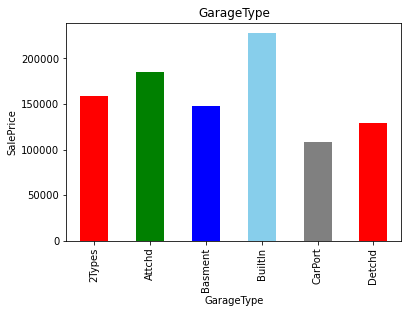

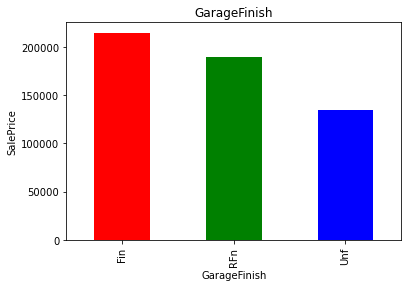

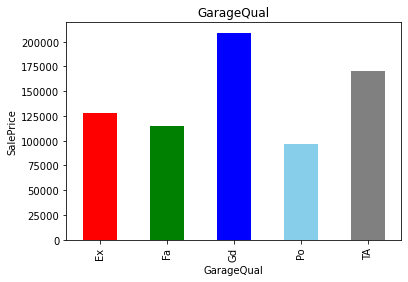

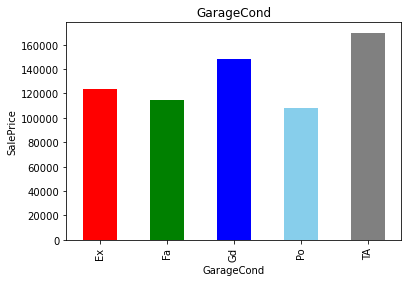

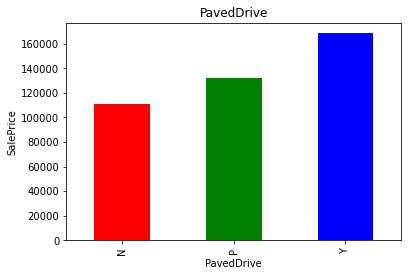

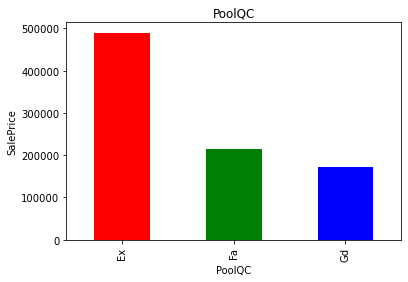

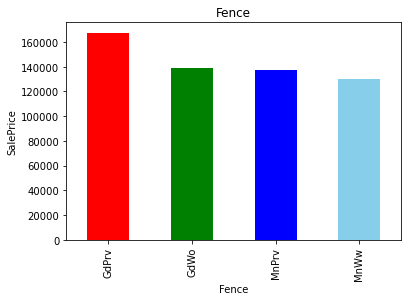

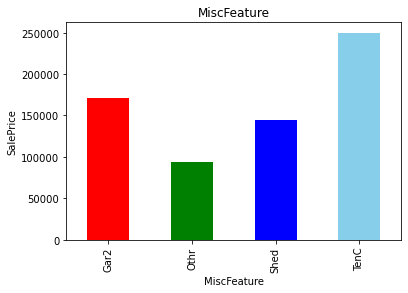

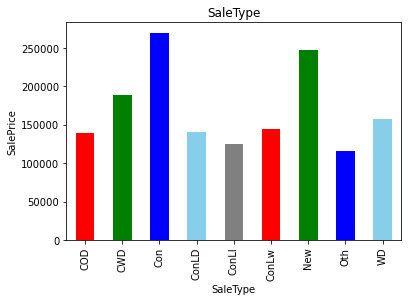

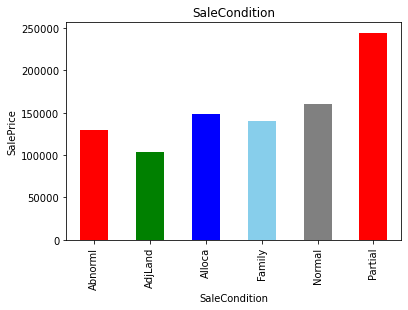

In [45]:
## Relationship bw categorical variables and dependent variable (SalePrice)

for i in cat_feat:
    n_data=data.copy()
    
    n_data.groupby(i)['SalePrice'].median().plot.bar(color=['red','green','blue','skyblue','grey'])
    
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()

* Here we can find out valuable insights like which category is responsible for the highest SalePrice or so on.

# FEATURE ENGINEERING

We will be performing all the below steps in Feature Engineering

# Handling Missing values:

## Training data

In [46]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,2.201872,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,4.382027,2.215885,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,4.219508,2.233034,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,4.094345,2.215315,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,4.430817,2.258133,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

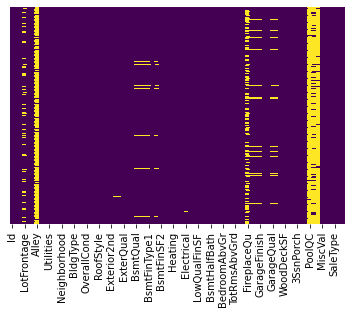

In [48]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

* You see those yellow strips, those are our nan values to be handled.

* First of all, lets see how many numerical variables are there.

In [49]:
num=data._get_numeric_data().columns                       #all of the numerical columns
num

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [50]:
len(num)

38

* Then we gotta see how many of them are categorical variables.

In [51]:
cat_features=[i for i in data.columns if data.dtypes[i]=='object']      #all of the categorical features
#pd.DataFrame(cat_features,columns=['Categorical Features'])
np.array([cat_features])

array([['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
        'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
        'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']],
      dtype='<U13')

In [52]:
len(cat_features)

43

* It's important to know how many of our variables are numerical and categorical as:
   * In case of Categorical varibles, null values has to filled with their mode (ie. number of frequency)
   * In case of numerical varibles, null values has to be filled with their mean
* NOTE: Varibles with a huge number of null values can be dropped or removed.

In [53]:
#Handling numerical varibles
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['GarageYrBlt']=data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())

In [54]:
#Handling Categorical Varibles 
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])

In [55]:
#Removing some of the varibles
data=data.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley','Id'],axis=1)
data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,2.201872,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,4.382027,2.215885,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,4.219508,2.233034,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500


<AxesSubplot:>

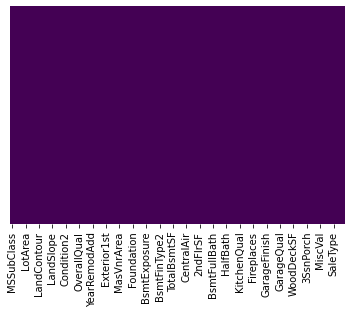

In [56]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

* IN HEATMAP: We can see no yellow spots , that indicates that there are NO null values in the dataset now.
   * So, we are good to GO

## Test data

In [57]:
test_df=pd.read_csv(r'E:\Downloads\test (1).csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [58]:
test_df.shape

(1459, 80)

* Test dataset will only contain independent varibles and not the Target varible because that we need to find.

* Handling null values for test dataset

In [59]:
#test_df.info()

<AxesSubplot:>

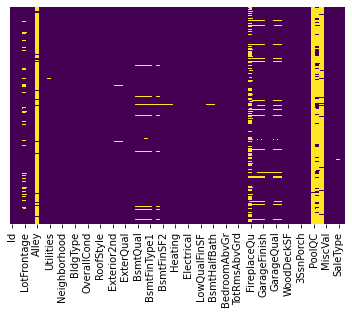

In [60]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [61]:
num_cols=test_df._get_numeric_data().columns                       #all of the numerical columns
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [62]:
len(num_cols)

37

In [63]:
cat_feat=[i for i in test_df.columns if test_df.dtypes[i]=='object']      #all of the categorical features
#pd.DataFrame(cat_feat,columns=['Categorical Features'])
np.array([cat_feat])

array([['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
        'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
        'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']],
      dtype='<U13')

In [64]:
len(cat_feat)

43

In [65]:
#Handling numerical varibles
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['GarageYrBlt']=test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mean())
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mean())

In [66]:
#Handling Categorical Varibles 
test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['Electrical']=test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

In [67]:
#Removing some of the varibles
test_df=test_df.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley','Id'],axis=1)
test_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal


<AxesSubplot:>

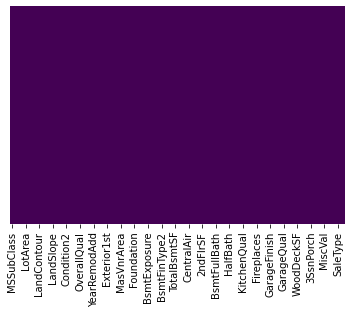

In [68]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

SAFAI HOGYI BHAISAAB !!!

* Now, we can apply Encoding simulataneously to both train and test dataset.

## ENCODING TECHNIQUES

In [69]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']


In [70]:
len(columns)

38

In [71]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [72]:
main_df=data.copy()

In [73]:
test_df.shape

(1459, 74)

In [74]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [75]:
final_df=pd.concat([data,test_df],axis=0)

In [76]:
final_df.shape

(2919, 75)

In [77]:
##Handle categorical features

In [78]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [79]:
final_df.shape

(2919, 233)

In [80]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]   ##removing duplicate columns

In [81]:
final_df.shape

(2919, 177)

In [82]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,4.174387,2.201872,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,4.382027,2.215885,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,4.219508,2.233034,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,4.094345,2.215315,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,4.430817,2.258133,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [83]:
final_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Min1', 'Min2', 'Typ', 'Attchd', 'Basment', 'BuiltIn', 'CarPort',
       'Detchd', 'RFn', 'P'],
      dtype='object', length=177)

## We are done with enccoding Now split the data again

In [84]:
df_train=final_df.iloc[:1460,:]
df_test=final_df.iloc[1460:,:]

In [86]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,4.174387,2.201872,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,4.382027,2.215885,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,4.219508,2.233034,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,4.094345,2.215315,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,4.430817,2.258133,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [88]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622.0,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267.0,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830.0,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978.0,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005.0,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [85]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [86]:
df_test.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622.0,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267.0,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830.0,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0


## Extract independent and dependent variables

In [87]:
X_train=df_train.drop(['SalePrice'],axis=1)   #x variable
y_train=df_train['SalePrice']                 #y variable

In [88]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,4.174387,2.201872,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,4.382027,2.215885,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,4.219508,2.233034,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,4.094345,2.215315,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,4.430817,2.258133,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [89]:
y_train

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

## Model buidling and Prediction

In [91]:
df_test.shape

(1459, 176)

In [94]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)





#import xgboost
#classifier=xgboost.XGBRegressor()
#classifier.fit(X_train,y_train)

RandomForestClassifier()

In [95]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [96]:
df_test.shape

(1459, 176)

In [97]:
y_pred=classifier.predict(df_test)
y_pred

array([190000., 215000., 160000., ..., 160000., 160000., 160000.])

In [98]:
pred=pd.DataFrame(y_pred)
pred

,0
0,190000.0
1,215000.0
2,160000.0
3,160000.0
4,160000.0
...,...
1454,160000.0
1455,160000.0
1456,160000.0
1457,160000.0


In [122]:
sub_df=pd.read_csv(r'E:\Downloads\sample_submission.csv')
sub_df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [123]:
dataset=pd.concat([sub_df['Id'],pred],axis=1)
dataset.columns=['Id','SalePrice']

In [124]:
dataset.to_csv(r'E:\Downloads\sample_submission.csv',index=False)